Import everything

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.src.models import Sequential
from keras.src.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

LSTM #1
This LSTM only imputes the data, it does nothing else to infuence the data or the model. In other words these are fairly standard parameters for and LSTM model.

Step 2: Data loaded
   year   fips   state.x  county.x  \
0  2025  36000  New York     Total   
1  2025  36001  New York    Albany   
2  2025  36003  New York  Allegany   
3  2025  36005  New York     Bronx   
4  2025  36007  New York    Broome   

   percent_household_income_required_for_child_care_expenses  \
0                                               38.0           
1                                               37.0           
2                                               43.0           
3                                               65.0           
4                                               39.0           

   food_environment_index  percent_fair_or_poor_health  percent_unemployed  \
0                     8.7                           16                 4.2   
1                     8.4                           12                 3.3   
2                     8.2                           16                 4.3   
3                     7.1                           28

c:\Users\jashb\OneDrive\Documents\Masters Data Science\Spring 2025\DATA 698\Masters Project\DATA_698\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 121.7004 - val_loss: 94.0910
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 121.2205 - val_loss: 93.7601
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 118.2492 - val_loss: 93.4184
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 128.2798 - val_loss: 93.0137
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 126.4047 - val_loss: 92.4951
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 118.4317 - val_loss: 91.8255
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 121.4179 - val_loss: 90.9460
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 116.2807 - val_loss: 89.7895
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 116.5891 - val_loss: 88.2438
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 113.0982 - val_loss: 86.1504
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 112.9521 - val_loss: 83.3043
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step -

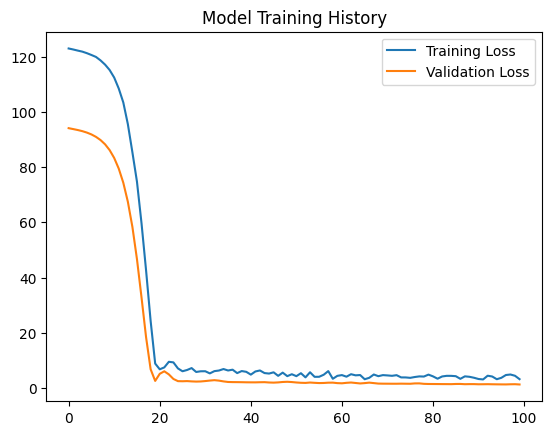

In [27]:

# Step 2: Load data
filepath = "C:\\Users\\jashb\\OneDrive\\Documents\\Masters Data Science\\Spring 2025\\DATA 698\\Masters Project\\final_data.csv"
df = pd.read_csv(filepath)
print("Step 2: Data loaded")
print(df.head())
# Step: Impute missing values
# Impute numeric columns with their mean
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute categorical columns with the most frequent value
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

print("\nStep: Imputed missing values")
print(df.isnull().sum())  # Verify no missing values remain

# Step: Drop rows with missing target
df = df.dropna(subset=['percent_food_insecure'])
print("\nStep: Dropped rows with missing 'percent_food_insecure'")
print(df.head())
# Step 3: Drop rows with missing target
df = df.dropna(subset=['percent_food_insecure'])
print("\nStep 3: Dropped rows with missing 'percent_food_insecure'")
print(df.head())

# Step 4: Convert 'rural_urban' to numeric
df['rural_urban'] = pd.factorize(df['rural_urban'])[0]
print("\nStep 4: Converted 'rural_urban' to numeric")
print(df[['rural_urban']].head())

# Step 5: Create lag features
df = df.sort_values(['fips', 'year'])
df['food_insecure_lag1'] = df.groupby('fips')['percent_food_insecure'].shift(1)
df['food_insecure_lag2'] = df.groupby('fips')['percent_food_insecure'].shift(2)
print("\nStep 5: Created lag features")
print(df[['fips', 'year', 'percent_food_insecure', 'food_insecure_lag1', 'food_insecure_lag2']].head())

# Step 6: Drop rows with missing lag features
df = df.dropna(subset=['food_insecure_lag1', 'food_insecure_lag2'])
print("\nStep 6: Dropped rows with missing lag features")
print(df.head())

# Step 7: Select features
features = [
    'percent_household_income_required_for_child_care_expenses',
    'food_environment_index',
    'percent_fair_or_poor_health',
    'percent_unemployed',
    'percent_children_in_poverty',
    'percent_severe_housing_problems',
    'percent_completed_high_school',
    'percent_frequent_mental_distress',
    'percent_uninsured_children',
    'percent_disconnected_youth',
    'spending_per_pupil',
    'school_funding_adequacy',
    'high_school_graduation_rate',
    'median_household_income',
    'gender_pay_gap',
    'percent_enrolled_in_free_or_reduced_lunch',
    'percent_households_with_severe_cost_burden',
    'percent_rural',
    'percent_65_and_over',
    'percent_not_proficient_in_english',
    'segregation_index',
    'teen_birth_rate',
    'percent_children_in_single_parent_households',
    'percent_low_birthweight',
    'percent_black',
    'rural_urban',
    'food_insecure_lag1',
    'food_insecure_lag2'
]

available_features = [f for f in features if f in df.columns]
df = df[['year', 'fips', 'county.x', 'state.x', 'percent_food_insecure'] + available_features]
print("\nStep 7: Selected features")
print(df.head())

# Step 8: Analyze data
print("\nStep 8: Data Analysis")
print(f"Years available: {sorted(df['year'].unique())}")
print(f"Counties with data: {df['fips'].nunique()}")

county_years = df.groupby('fips')['year'].count()
print(f"\nMinimum years per county: {county_years.min()}")
print(f"Maximum years per county: {county_years.max()}")

# Step 9: Set n_steps
min_years = county_years.min()
n_steps = min(1, min_years)  # Use 3 if possible, otherwise use the minimum available
print(f"Using n_steps = {n_steps}")

# Step 10: Split data into train and test
latest_year = df['year'].max()
train = df[df['year'] < latest_year]
test = df[df['year'] == latest_year]
print(f"\nTraining years: {sorted(train['year'].unique())}")
print(f"Test year: {test['year'].unique()}")

# Step 11: Prepare training data
counties = train['fips'].unique()
X_train, y_train = [], []
scaler = MinMaxScaler()

all_features = train.drop(columns=['year', 'fips', 'county.x', 'state.x', 'percent_food_insecure'])
scaler.fit(all_features)

for county in counties:
    county_data = train[train['fips'] == county].sort_values('year')
    if len(county_data) < n_steps:
        continue
    features = county_data.drop(columns=['year', 'fips', 'county.x', 'state.x', 'percent_food_insecure'])
    target = county_data['percent_food_insecure'].values
    scaled_features = scaler.transform(features)
    for i in range(n_steps, len(county_data)):
        X_train.append(scaled_features[i-n_steps:i])
        y_train.append(target[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Check if X_train is empty
if len(X_train) == 0:
    raise ValueError("No training data available. Check your data or reduce n_steps.")

print(f"\nTraining data shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
# Step 12: Prepare test data
X_test, y_test = [], []
test_counties = test['fips'].unique()

for county in test_counties:
    county_data = df[(df['fips'] == county) & (df['year'] <= latest_year)].sort_values('year')
    if len(county_data) < n_steps + 1:  # Need n_steps years + target year
        continue
    # Get features from n_steps previous years
    features = county_data.iloc[-(n_steps+1):-1].drop(columns=['year', 'fips', 'county.x', 'state.x', 'percent_food_insecure'])
    target = county_data.iloc[-1]['percent_food_insecure']
    scaled_features = scaler.transform(features)
    X_test.append(scaled_features)
    y_test.append(target)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"\nTest data shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")

# Step 13: Build LSTM model
input_shape = (X_train.shape[1], X_train.shape[2])
model = Sequential([
    LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Step 14: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 15: Evaluate the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f"\nTrain RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, test_pred))}")

# Step 16: Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Training History')
plt.show()

Visualizing RMSE for LSTM #1

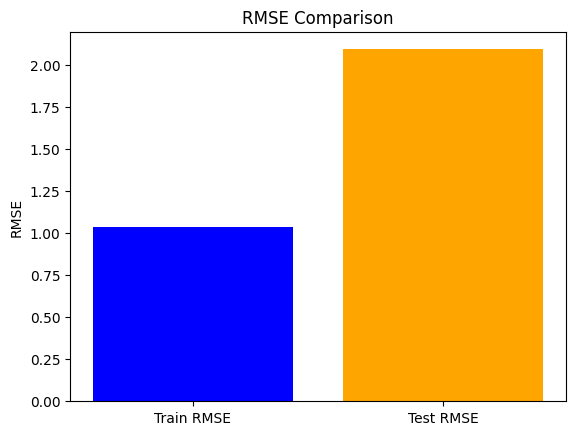

In [28]:
# Visualize RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

plt.bar(['Train RMSE', 'Test RMSE'], [train_rmse, test_rmse], color=['blue', 'orange'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

Test Data : Predicted vs Actual

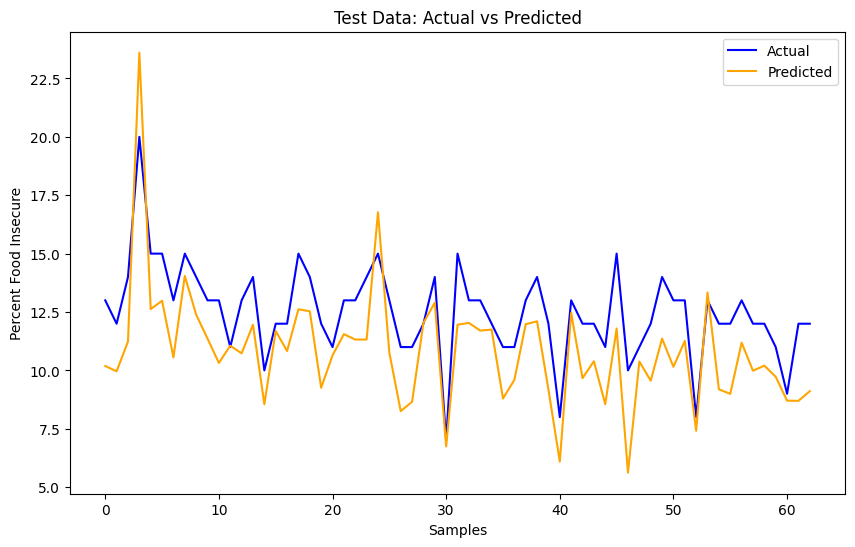

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(test_pred, label='Predicted', color='orange')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Percent Food Insecure')
plt.legend()
plt.show()

Residual Analysis

Training Residuals

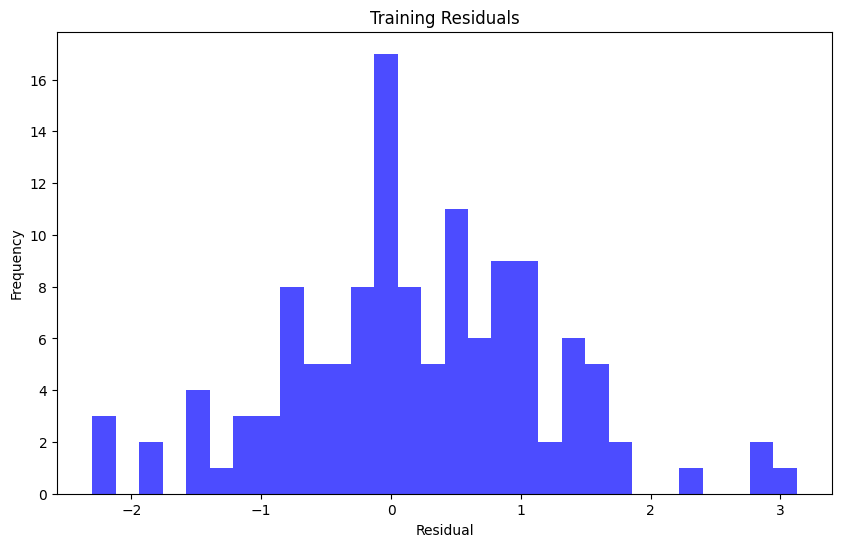

In [30]:
train_residuals = y_train - train_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(train_residuals, bins=30, color='blue', alpha=0.7)
plt.title('Training Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

Test Residuals

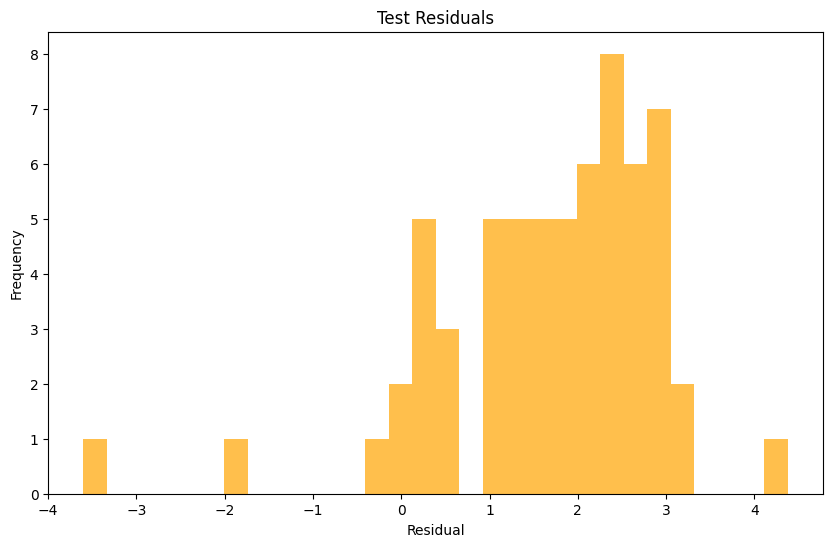

In [31]:
test_residuals = y_test - test_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(test_residuals, bins=30, color='orange', alpha=0.7)
plt.title('Test Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

Training Loss Curve

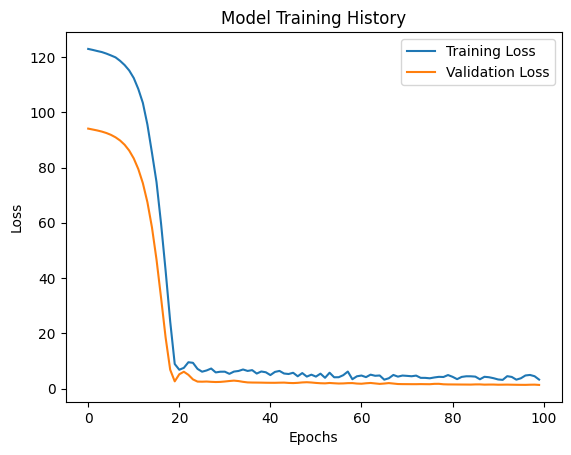

In [32]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Highest percentage yearly change in food insecurity

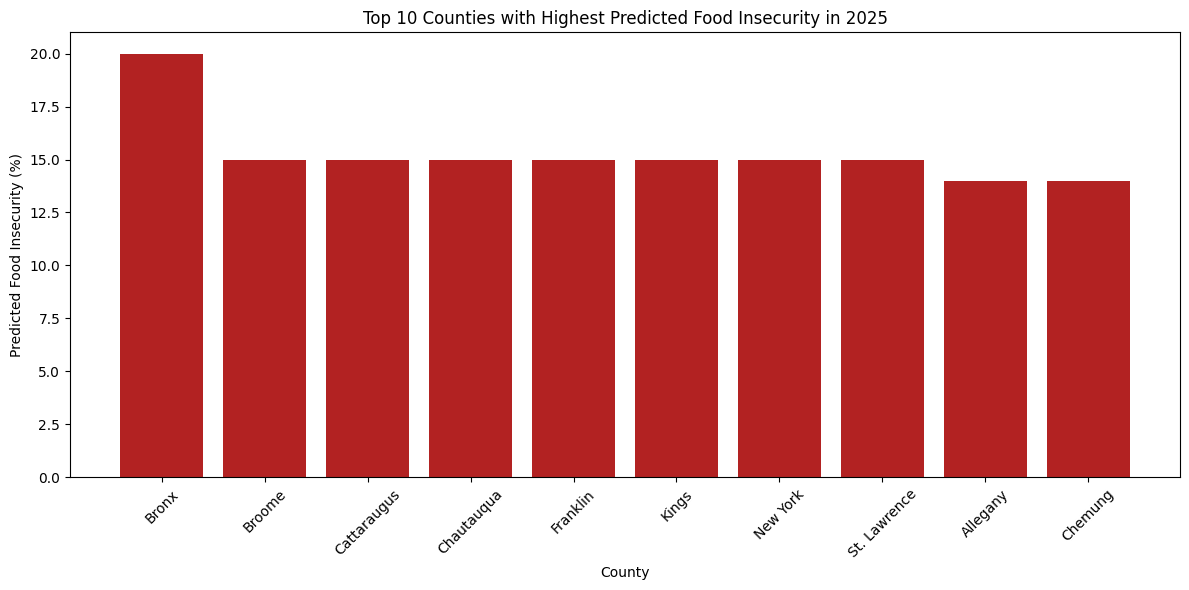

In [36]:
top_10_counties = test.nlargest(10, 'percent_food_insecure')

plt.figure(figsize=(12, 6))
plt.bar(top_10_counties['county.x'], top_10_counties['percent_food_insecure'], color='firebrick')
plt.title('Top 10 Counties with Highest Predicted Food Insecurity in 2025')
plt.xlabel('County')
plt.ylabel('Predicted Food Insecurity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Scatter Plot Analysis: Actual vs Predicted

Training Scatter

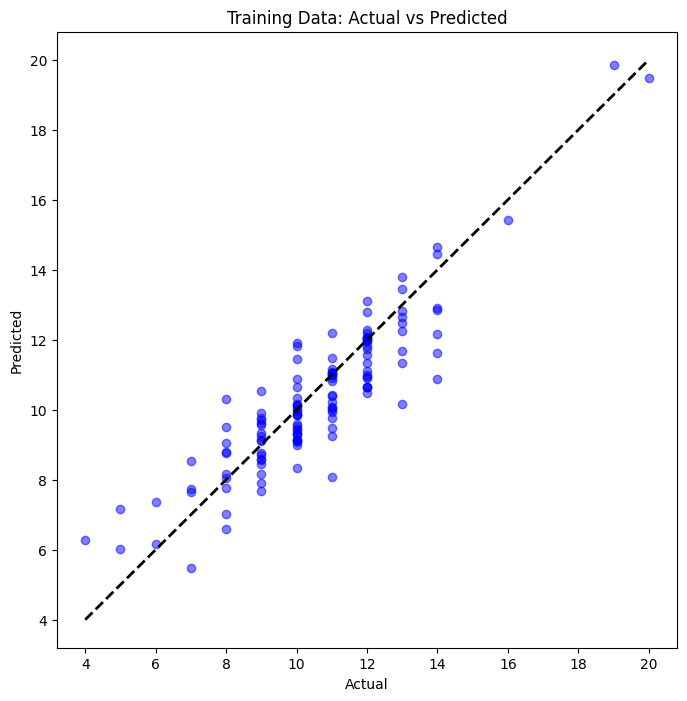

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Test Scatter

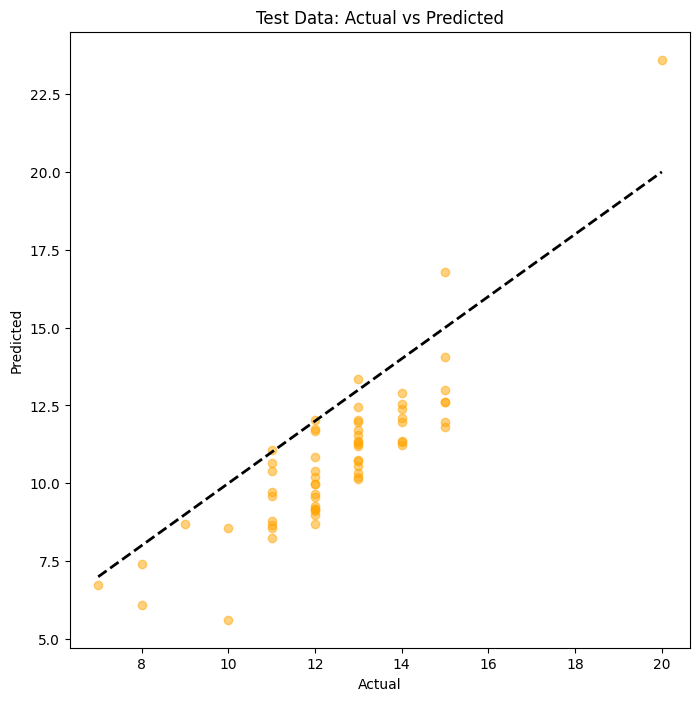

In [39]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()